# 03 Data Visualization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# common imports
import numpy as np
import pandas as pd
from typing import List
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
from datetime import datetime

# will display all the columns in the df moving forward
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [3]:
from src.data_preparation import load_csv_data_from_disk
df = load_csv_data_from_disk(file_name='transformed.csv')

## Data Exploration

In [4]:
# convert date_time col from an object dtype to a date_time dtype
df['date_time'] = pd.to_datetime(df['date_time'])

In [5]:
# be able to trace back to team names
di_home = dict(zip(df.home_team, df.home_team_code))
di_away = dict(zip(df.away_team, df.away_team_code))

In [6]:
df.shape

(7660, 80)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7660 entries, 0 to 7659
Data columns (total 80 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   season                                         7660 non-null   int64         
 1   week                                           7660 non-null   int64         
 2   home_team                                      7660 non-null   object        
 3   date_time                                      7660 non-null   datetime64[ns]
 4   home_team_win_rate_last_1_games                7203 non-null   float64       
 5   home_team_win_rate_last_4_games                5832 non-null   float64       
 6   home_team_win_rate_last_8_games                4021 non-null   float64       
 7   home_team_pass_rate_last_1_games               7202 non-null   float64       
 8   home_team_pass_rate_last_4_games               5831 non-nu

In [8]:
# determining how many missing values are in each column
df.isnull().sum()

season                                              0
week                                                0
home_team                                           0
date_time                                           0
home_team_win_rate_last_1_games                   457
home_team_win_rate_last_4_games                  1828
home_team_win_rate_last_8_games                  3639
home_team_pass_rate_last_1_games                  458
home_team_pass_rate_last_4_games                 1829
home_team_pass_rate_last_8_games                 3640
home_team_rush_rate_last_1_games                  457
home_team_rush_rate_last_4_games                 1828
home_team_rush_rate_last_8_games                 3639
home_team_pass_allowed_rate_last_1_games          457
home_team_pass_allowed_rate_last_4_games         1828
home_team_pass_allowed_rate_last_8_games         3639
home_team_rush_allowed_rate_last_1_games          457
home_team_rush_allowed_rate_last_4_games         1828
home_team_rush_allowed_rate_

In [9]:
df.describe()

,season,week,home_team_win_rate_last_1_games,home_team_win_rate_last_4_games,home_team_win_rate_last_8_games,home_team_pass_rate_last_1_games,home_team_pass_rate_last_4_games,home_team_pass_rate_last_8_games,home_team_rush_rate_last_1_games,home_team_rush_rate_last_4_games,home_team_rush_rate_last_8_games,home_team_pass_allowed_rate_last_1_games,home_team_pass_allowed_rate_last_4_games,home_team_pass_allowed_rate_last_8_games,home_team_rush_allowed_rate_last_1_games,home_team_rush_allowed_rate_last_4_games,home_team_rush_allowed_rate_last_8_games,home_team_ot_rate_last_1_games,home_team_ot_rate_last_4_games,home_team_ot_rate_last_8_games,home_team_to_rate_last_1_games,home_team_to_rate_last_4_games,home_team_to_rate_last_8_games,home_team_to_forced_rate_last_1_games,home_team_to_forced_rate_last_4_games,home_team_to_forced_rate_last_8_games,home_team_points_scored_rate_last_1_games,home_team_points_scored_rate_last_4_games,home_team_points_scored_rate_last_8_games,home_team_points_allowed_rate_last_1_games,home_team_points_allowed_rate_last_4_games,home_team_points_allowed_rate_last_8_games,home_team_1st_downs_rate_last_1_games,home_team_1st_downs_rate_last_4_games,home_team_1st_downs_rate_last_8_games,home_team_1st_downs_allowed_rate_last_1_games,home_team_1st_downs_allowed_rate_last_4_games,home_team_1st_downs_allowed_rate_last_8_games,home_team_win,away_team_win_rate_last_1_games,away_team_win_rate_last_4_games,away_team_win_rate_last_8_games,away_team_pass_rate_last_1_games,away_team_pass_rate_last_4_games,away_team_pass_rate_last_8_games,away_team_rush_rate_last_1_games,away_team_rush_rate_last_4_games,away_team_rush_rate_last_8_games,away_team_pass_allowed_rate_last_1_games,away_team_pass_allowed_rate_last_4_games,away_team_pass_allowed_rate_last_8_games,away_team_rush_allowed_rate_last_1_games,away_team_rush_allowed_rate_last_4_games,away_team_rush_allowed_rate_last_8_games,away_team_ot_rate_last_1_games,away_team_ot_rate_last_4_games,away_team_ot_rate_last_8_games,away_team_to_rate_last_1_games,away_team_to_rate_last_4_games,away_team_to_rate_last_8_games,away_team_to_forced_rate_last_1_games,away_team_to_forced_rate_last_4_games,away_team_to_forced_rate_last_8_games,away_team_points_scored_rate_last_1_games,away_team_points_scored_rate_last_4_games,away_team_points_scored_rate_last_8_games,away_team_points_allowed_rate_last_1_games,away_team_points_allowed_rate_last_4_games,away_team_points_allowed_rate_last_8_games,away_team_1st_downs_rate_last_1_games,away_team_1st_downs_rate_last_4_games,away_team_1st_downs_rate_last_8_games,away_team_1st_downs_allowed_rate_last_1_games,away_team_1st_downs_allowed_rate_last_4_games,away_team_1st_downs_allowed_rate_last_8_games,home_team_code,away_team_code
count,7660.000000,7660.000000,7203.000000,5832.000000,4021.000000,7202.000000,5831.000000,4020.000000,7203.000000,5832.000000,4021.000000,7203.000000,5832.000000,4021.000000,7203.000000,5832.000000,4021.000000,7203.000000,5832.000000,4021.000000,7203.000000,5832.000000,4021.000000,7203.000000,5832.000000,4021.000000,7203.000000,5832.000000,4021.000000,7203.000000,5832.000000,4021.000000,7203.000000,5832.000000,4021.000000,7203.000000,5832.000000,4021.000000,7660.000000,7204.000000,5836.000000,3995.000000,7204.000000,5836.000000,3995.000000,7204.000000,5836.000000,3995.000000,7203.000000,5833.000000,3992.000000,7204.000000,5836.000000,3995.000000,7204.000000,5836.000000,3995.000000,7204.000000,5836.000000,3995.000000,7204.000000,5836.000000,3995.000000,7204.000000,5836.000000,3995.000000,7204.000000,5836.000000,3995.000000,7204.000000,5836.000000,3995.000000,7204.000000,5836.000000,3995.000000,7660.000000,7660.000000
mean,2008.244386,9.562663,0.485631,0.504587,0.515388,219.168703,221.212699,221.966169,112.257948,113.208376,113.849509,221.612245,221.034251,220.414169,113.907539,113.183428,112.558816,0.058309,0.062457,0.064909,1.623907,1.628258,1.611477,1.651395,1.649563,1.646978,21.604193,21.986754,22.211235,22.054561,21.858539,21.

In [32]:
df.corr()['home_team_win'] <= -0.1

<ipython-input-32-e08009357a38>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['home_team_win'] <= -0.1


season                                           False
week                                             False
home_team_win_rate_last_1_games                  False
home_team_win_rate_last_4_games                  False
home_team_win_rate_last_8_games                  False
home_team_pass_rate_last_1_games                 False
home_team_pass_rate_last_4_games                 False
home_team_pass_rate_last_8_games                 False
home_team_rush_rate_last_1_games                 False
home_team_rush_rate_last_4_games                 False
home_team_rush_rate_last_8_games                 False
home_team_pass_allowed_rate_last_1_games         False
home_team_pass_allowed_rate_last_4_games         False
home_team_pass_allowed_rate_last_8_games         False
home_team_rush_allowed_rate_last_1_games         False
home_team_rush_allowed_rate_last_4_games          True
home_team_rush_allowed_rate_last_8_games          True
home_team_ot_rate_last_1_games                   False
home_team_

In [33]:
cols_to_keep = ['season', 'week', 'home_team', 'home_team_code', 'away_team', 'away_team_code', 'date_time', 'home_team_win', 
                'home_team_win_rate_last_1_games', 'home_team_win_rate_last_4_games', 'home_team_win_rate_last_8_games', 
                'home_team_pass_rate_last_8_games',
                'home_team_rush_allowed_rate_last_4_games', 'home_team_rush_allowed_rate_last_8_games',
                'home_team_points_scored_rate_last_1_games', 'home_team_points_scored_rate_last_4_games', 'home_team_points_scored_rate_last_8_games',
                'home_team_points_allowed_rate_last_4_games', 'home_team_points_allowed_rate_last_8_games',
                'home_team_1st_downs_rate_last_4_games', 'home_team_1st_downs_rate_last_8_games', 
                'away_team_win_rate_last_4_games', 'away_team_win_rate_last_8_games',
                'away_team_pass_rate_last_4_games', 'away_team_pass_rate_last_8_games',
                'away_team_rush_allowed_rate_last_8_games', 
                'away_team_points_scored_rate_last_4_games', 'away_team_points_scored_rate_last_8_games',
                'away_team_points_allowed_rate_last_8_games', 
                'away_team_1st_downs_rate_last_4_games', 'away_team_1st_downs_rate_last_8_games']

In [34]:
len(cols_to_keep)

31

In [11]:
# discovering how many times an opponent played a home game
df.home_team.value_counts()

New England Patriots     265
Pittsburgh Steelers      256
Green Bay Packers        254
Kansas City Chiefs       252
Philadelphia Eagles      251
San Francisco 49ers      249
Seattle Seahawks         248
Denver Broncos           247
Indianapolis Colts       246
New Orleans Saints       245
Los Angeles Rams         245
Dallas Cowboys           245
Minnesota Vikings        243
New York Giants          241
Los Angeles Chargers     241
Tampa Bay Buccaneers     241
Chicago Bears            240
Buffalo Bills            240
Atlanta Falcons          240
Las Vegas Raiders        239
Tennessee Titans         239
Miami Dolphins           238
Cincinnati Bengals       238
Arizona Cardinals        237
Washington Commanders    237
New York Jets            235
Carolina Panthers        234
Detroit Lions            233
Jacksonville Jaguars     230
Baltimore Ravens         226
Cleveland Browns         210
Houston Texans           175
Name: home_team, dtype: int64

In [12]:
# discovering how many times an opponent played an away game
df.away_team.value_counts()

Green Bay Packers        253
Indianapolis Colts       252
New England Patriots     250
Philadelphia Eagles      248
San Francisco 49ers      247
Seattle Seahawks         247
Pittsburgh Steelers      246
New York Jets            245
Tennessee Titans         245
Minnesota Vikings        245
New York Giants          244
Atlanta Falcons          244
Dallas Cowboys           243
Tampa Bay Buccaneers     243
Miami Dolphins           242
Los Angeles Chargers     242
Denver Broncos           242
Cincinnati Bengals       241
Arizona Cardinals        241
Los Angeles Rams         241
Detroit Lions            240
New Orleans Saints       240
Kansas City Chiefs       239
Buffalo Bills            239
Washington Commanders    237
Chicago Bears            237
Las Vegas Raiders        236
Jacksonville Jaguars     236
Baltimore Ravens         236
Carolina Panthers        233
Cleveland Browns         213
Houston Texans           173
Name: away_team, dtype: int64

In [13]:
#sns.pairplot(df, hue="home_team_win")

In [ ]:
sns.scatterplot(x=df['season'], y=df['home_team_1st_downs_rate_last_8_games']);

In [ ]:
cond_plot = sns.FacetGrid(data=df, col='home_team', hue=None, col_wrap=4)
cond_plot.map(sns.scatterplot, 'season', 'away_team_to_forced_rate_last_8_games');

In [14]:
df.columns

Index(['season', 'week', 'home_team', 'date_time',
       'home_team_win_rate_last_1_games', 'home_team_win_rate_last_4_games',
       'home_team_win_rate_last_8_games', 'home_team_pass_rate_last_1_games',
       'home_team_pass_rate_last_4_games', 'home_team_pass_rate_last_8_games',
       'home_team_rush_rate_last_1_games', 'home_team_rush_rate_last_4_games',
       'home_team_rush_rate_last_8_games',
       'home_team_pass_allowed_rate_last_1_games',
       'home_team_pass_allowed_rate_last_4_games',
       'home_team_pass_allowed_rate_last_8_games',
       'home_team_rush_allowed_rate_last_1_games',
       'home_team_rush_allowed_rate_last_4_games',
       'home_team_rush_allowed_rate_last_8_games',
       'home_team_ot_rate_last_1_games', 'home_team_ot_rate_last_4_games',
       'home_team_ot_rate_last_8_games', 'home_team_to_rate_last_1_games',
       'home_team_to_rate_last_4_games', 'home_team_to_rate_last_8_games',
       'home_team_to_forced_rate_last_1_games',
       'home_t

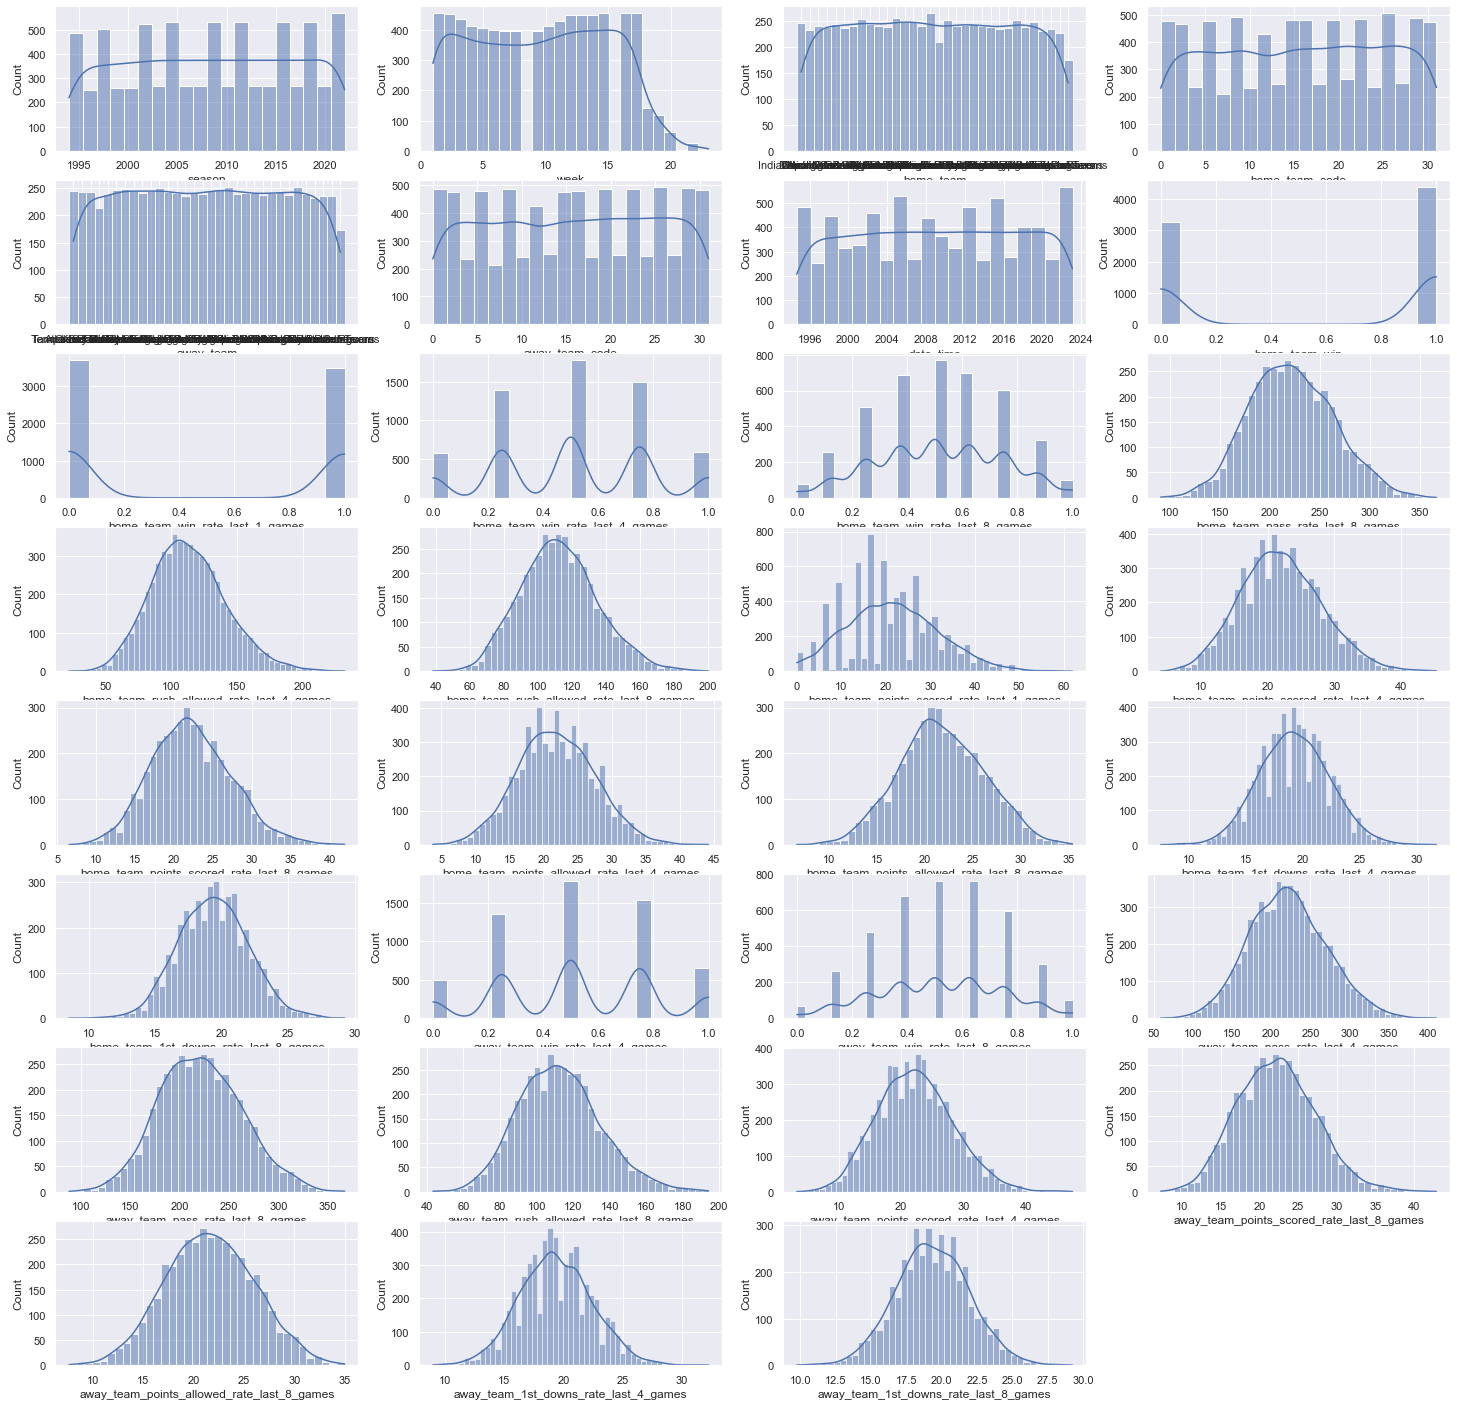

In [36]:
sns.set(rc={'figure.figsize':(25,25)})
for i, column in enumerate(cols_to_keep, 1):
    plt.subplot(8,4,i)
    p=sns.histplot(x=column, data=df, stat='count', kde=True)

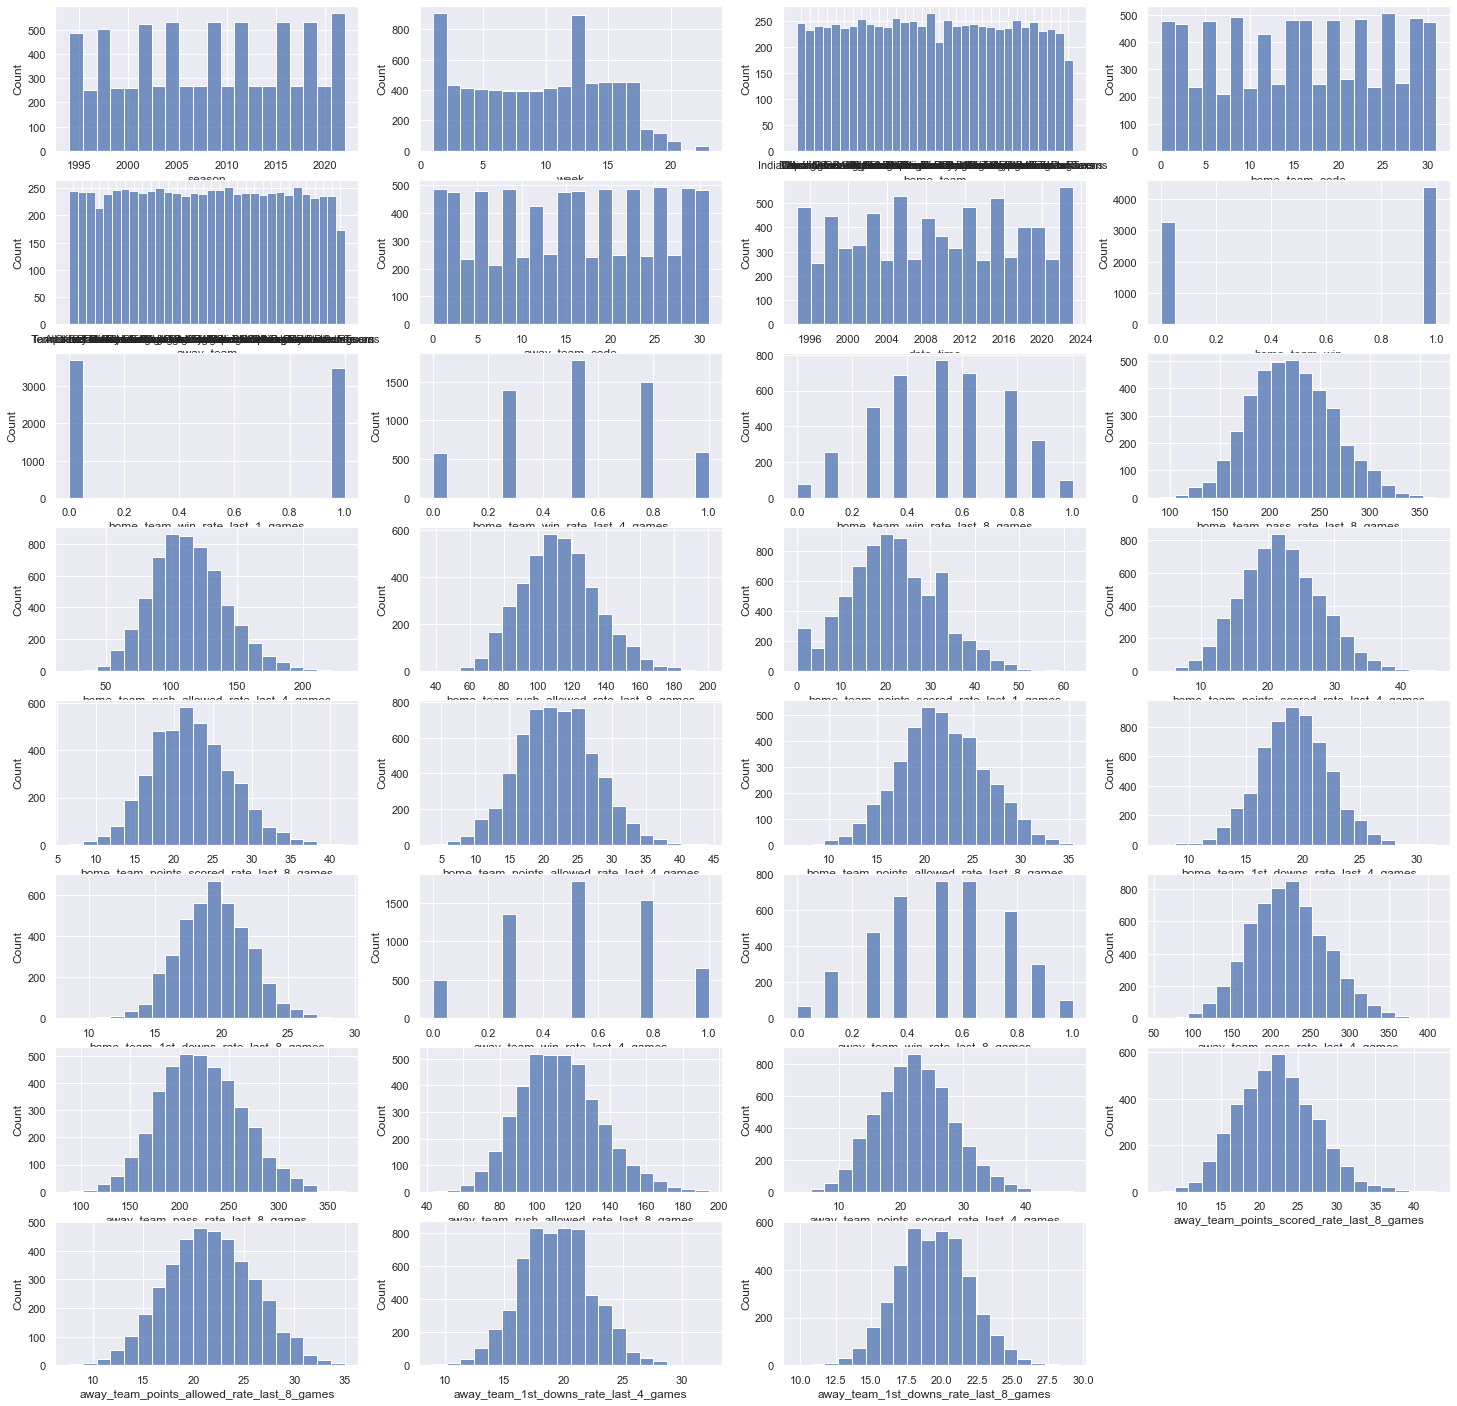

In [37]:
sns.set(rc={'figure.figsize':(25,25)})
for i, column in enumerate(cols_to_keep, 1):
    plt.subplot(8,4,i)
    p=sns.histplot(x=column, data=df, stat='count',bins = 20)

In [ ]:
# # importing a new library that was recommended to me by my mentor
import sweetviz as sv

#df_report = sv.analyze(df)
df_report.show_html()
# #df_report.show_notebook()

In [ ]:
# compares two dataframes via sweetviz
#df_comp = sv.compare(df, x)

In [ ]:
# another way to get great insights is to use the comparison functionality to split your dataset into 2 sub-populations.
#df_comp_intra = sv.compare_intra(df)

In [ ]:
df